

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 


## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1.** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    zero = arr==0
    try: 
        return arr[1:][zero[:-1]].max()
    except ValueError:
        return None 
max_element(np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]))

5

**2. ** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [3]:
def nearest_value(X, v):
    func = np.vectorize(lambda x: abs(x-v))
    delta = func(X)
    index_min = np.argmin(delta)
    return X[index_min]

nearest_value(np.arange(0,10), 3.6)

4

**3. ** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [4]:
def scale(X):
    mean = np.mean(X, axis=0)
    var = np.std(X, axis=0)
    if 0 not in var:
        return (X - mean)/var
    
X = np.random.randint(0, 15, (3, 2))
print(X)
scale(X)

[[ 9  7]
 [11  4]
 [13  6]]


array([[-1.22474487,  1.06904497],
       [ 0.        , -1.33630621],
       [ 1.22474487,  0.26726124]])

**4.** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [5]:
def get_stats(X):
    return (np.linalg.det(X), np.trace(X), np.amax(X), np.amin(X), np.linalg.norm(X), np.linalg.eig(X)[0], np.linalg.inv(X))
X = np.random.normal(10, 1, (3, 3))
get_stats(X)

(-20.211969000946066,
 28.43265184087179,
 12.168452551941966,
 8.752849213348652,
 30.19332367681371,
 array([29.97979381,  0.35452407, -1.90166605]),
 array([[ 1.83210086, -0.94473578, -0.98216814],
        [-0.2462469 , -0.10939055,  0.39300121],
        [-1.59313675,  1.15011965,  0.60547373]]))

**5.** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [6]:
max = []
for exp_num in range(100):
    f = np.random.normal(0, 1, 100)
    t = np.random.normal(0, 1, 100)
    max += [np.amax(f.dot(t))]
    
print(np.mean(max))

print(np.percentile(max, 0.95))

1.3325366545326087
-20.20718270174468


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [7]:
import pandas as pd
%matplotlib inline
df = pd.read_csv("2008.csv")
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**6.** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [8]:
df['CancellationCode'].mode()[0]

'A'

**7.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [9]:
print(df['Distance'].mean(), df['Distance'].max(), df['Distance'].min())

724.5082571428571 4962 31


**8.** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [10]:
print(df.loc[df['Distance'] == df['Distance'].min()][['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'Distance']])
fl_numbs = df.loc[df['Distance'] == df['Distance'].min()]['FlightNum']
print(df.loc[df['FlightNum'].isin(fl_numbs)][['Distance', 'FlightNum']])

       Year  Month  DayofMonth  DayOfWeek  FlightNum  Distance
1116   2008     12          30          2         65        31
6958   2008     12          26          5         65        31
17349  2008      8          18          1         64        31
27534  2008      3          11          2         64        31
46082  2008      8           9          6         65        31
48112  2008      2          28          4         64        31
       Distance  FlightNum
501         533         64
1116         31         65
1389        680         64
1517        680         65
2619       2381         64
...         ...        ...
66529        82         65
67172       533         64
68264       386         65
68338      2454         65
69305      1005         65

[78 rows x 2 columns]


**9.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [11]:
df['Origin'].value_counts().idxmax()

'ATL'

**10.** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [12]:
mean_time = df.groupby('Origin')['AirTime'].mean()
print(mean_time)
print(mean_time.idxmax())

Origin
ABE    88.266667
ABI    36.400000
ABQ    93.454321
ABY    35.714286
ACK    50.800000
         ...    
WRG    18.000000
XNA    85.945736
YAK    35.900000
YKM    79.000000
YUM    47.470588
Name: AirTime, Length: 297, dtype: float64
SJU


**11.** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [13]:
grouped = df[df['DepDelay'] > 0].groupby('Origin')['DepDelay'].agg(['count', 'sum'])
grouped = grouped[grouped['count'] > 1000]
print(grouped['sum'].idxmax())

ORD


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [14]:
df = pd.read_csv("2008.csv")

Y = df['DepDelay']
X = df.drop('DepDelay', 1)
print('Пропуски', X.isnull().any().any())
print('Кол-во пропусков', X.isnull().sum().sum())
print('Кол-во объектов имеют хотя бы один пропуск', X.isnull().any(axis=1).sum())
print('Кол-во признаков которые имеют хотя бы одно пропущенное значение', X.isnull().any(axis=0).sum())

Пропуски True
Кол-во пропусков 353816
Кол-во объектов имеют хотя бы один пропуск 70000
Кол-во признаков которые имеют хотя бы одно пропущенное значение 15


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [15]:
df = pd.read_csv("2008.csv")

df.dropna(subset = ['DepDelay'], inplace=True)
df = df[df['DepDelay'] != 0]

Y = df['DepDelay']
X = df.drop('DepDelay', 1)

print('кол-во пропусков у признаков:\n', X.isnull().sum(axis=0))  
print('общее количество объектов', str(len(df)))

Y = df['DepDelay']
X = df.drop(['Year', 'DepDelay', 'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TailNum'], 1)

кол-во пропусков у признаков:
 Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                140
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime      164
CRSElapsedTime           5
AirTime                164
ArrDelay               164
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 140
TaxiOut                  7
Cancelled                0
CancellationCode     63392
Diverted                 0
CarrierDelay         48538
WeatherDelay         48538
NASDelay             48538
SecurityDelay        48538
LateAircraftDelay    48538
dtype: int64
общее количество объектов 63404


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


**13.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [16]:
features_name = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
for feature_name in features_name:
    X[feature_name + '_Hour'] = X[feature_name] - X[feature_name] % 100
    X[feature_name + '_Minute'] = X[feature_name] % 100
X = X.drop(features_name, 1)

X.head(10).style 
print(X)
    

       Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum  \
0          6          18          3            WN        242   
1          6           4          3            XE       2380   
2          8           3          7            WN       1769   
3          1          23          3            OO       3802   
4          5           4          7            WN        399   
...      ...         ...        ...           ...        ...   
69994      1          26          6            OH       5218   
69995      5          12          1            DL        794   
69996      5          11          7            OO       6159   
69998      2          18          1            NW        641   
69999     12           6          6            WN        510   

       ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay Origin  ...  \
0                   57.0            65.0     46.0       8.0    MDW  ...   
1                  124.0           138.0    108.0       2.0    IAH  ...   
2     

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


**14.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [17]:
X = X.drop(['CRSDepTime_Minute', 'CRSDepTime_Hour', 'CRSArrTime_Hour', 'CRSArrTime_Minute'], 1)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


**15.** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

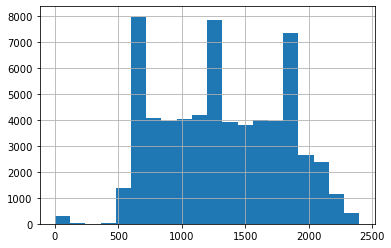

In [18]:
X['DepTime_Hour'].hist(bins=20)

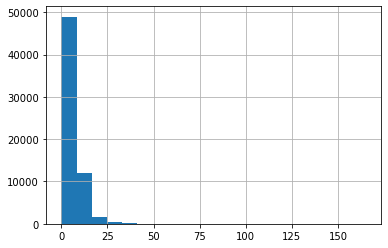

In [19]:
X['TaxiIn'].hist(bins=20)

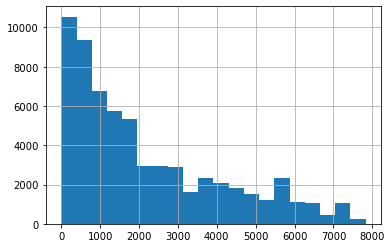

In [20]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [21]:
from sklearn import preprocessing
def transform_data(data):
    cat_features_mask = (data.dtypes == "object").values
    label_enc = preprocessing.LabelEncoder()
    for feature in data.columns[cat_features_mask]:
        data[feature] = label_enc.fit_transform(data[feature])

    enc = preprocessing.OneHotEncoder(sparse=False)
    data_str = enc.fit_transform(data[data.columns[cat_features_mask]])
    data_str = pd.DataFrame(data=data_str)

    data_str.drop(enc.feature_indices_[:-1], axis=1, inplace=True)


    data_real = data[data.columns[~cat_features_mask]]

    data_str.fillna('nan', inplace=True)
    data_real = data_real.fillna(0)
    normalizer = preprocessing.StandardScaler().fit_transform(data_real)
    data_real = pd.DataFrame(data=normalizer)


    data = pd.concat([data_real, data_str], axis=1)
    data.columns = np.array(["f"+str(i) for i in range(1, data.shape[1] + 1)])
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [22]:
X = transform_data(X)
X

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can s

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f619,f620,f621,f622,f623,f624,f625,f626,f627,f628
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.021975,-0.744130,-0.786908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,-0.175419,0.183961,-0.582387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,-0.712473,0.471018,-0.582387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.533455,-0.347886,-0.582387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,-0.661325,0.634799,-0.582387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.431159,-0.120706,1.053782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63400,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.533455,-0.217566,3.098994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63401,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,0.336062,-1.043514,-0.582387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63402,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,0.310488,1.208912,2.689951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
y_train

47629     5.0
39632    15.0
46373    99.0
42942    16.0
44966    79.0
         ... 
69067     1.0
42174    10.0
963      -3.0
17511     1.0
62292    -5.0
Name: DepDelay, Length: 44382, dtype: float64

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [ ]:
from sklearn.linear_model import LinearRegression as LR

from sklearn.metrics import r2_score, mean_squared_error
lr = LR()
X_tr = X_train[:1000]
y_tr = y_train[:1000]
X_ts = X_test[:1000]
y_ts = y_test[:1000]

lr.fit(X_tr, y_tr)

y_pred = lr.predict(X_ts)
y_pr = lr.predict(X_tr)

print(r2_score(y_ts, y_pred), r2_score(y_tr, y_pr))
print(mean_squared_error(y_ts, y_pred, ), mean_squared_error(y_tr, y_pr))
print('coeff', lr.coef_)

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18.** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [ ]:
# Your code here

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19.** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [ ]:
# Your code here

**20.** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [ ]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pass

In [ ]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pass

In [ ]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [ ]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [ ]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**21.** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [ ]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**22.** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23.**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24.** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25.** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here